In [1]:
from IPython.display import Image
import time
import pandas as pd
import numpy as np
import yellowbrick as yb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
from imblearn.over_sampling import RandomOverSampler

In [2]:
class timer:
    def __init__(self):
         print("init")
    def baslat(self):
        self.baslangic = time.perf_counter()

    def bitir(self):
        self.bitis = time.perf_counter()
        fark = (self.bitis-self.baslangic)*1000
        print(f"{fark} ms'de tamamlandı.")

timer = timer()

init


In [3]:
data=pd.read_json("yoksa.json")
data.head()

In [4]:
data = data.drop(["playingTime", "totalDuration", "lastPlayTime", "lastBufferingTime","question1", "question3",  "question4", "question5", "question6", "date", "resolution", "question2"], axis=1)
data.head()

,initialDelay,bufferingEvents,stallings,totalBufferingDuration,stallingRatio,VMOS
0,3314,3,0,4506,0.105775,2.5
1,897,3,0,1369,0.193937,2.5
2,3172,0,0,0,0.000000,4.5
3,3933,1,1,1269,0.030397,4.5
4,1177,0,0,0,0.000000,4.5


In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
##%matplotlib --
sns.histplot(data=data,x="VMOS");

In [5]:
y=data["VMOS"]#"
X=data.drop(["VMOS"],axis=1)
X.head() 

,initialDelay,bufferingEvents,stallings,totalBufferingDuration,stallingRatio
0,3314,3,0,4506,0.105775
1,897,3,0,1369,0.193937
2,3172,0,0,0,0.000000
3,3933,1,1,1269,0.030397
4,1177,0,0,0,0.000000


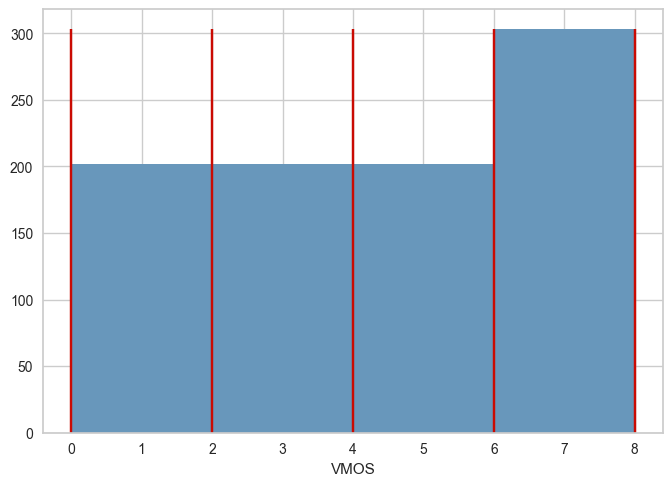

<Axes: xlabel='VMOS'>

In [11]:
from yellowbrick.target import BalancedBinningReference
visualizer=BalancedBinningReference()
visualizer.fit(y)
visualizer.target="VMOS"
visualizer.show()

In [10]:
veriler=["bufferingEvents","stallings","totalBufferingDuration","stallingRatio", "initialDelay"]#

In [ ]:
for i,deger in enumerate(veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.boxplot(x=deger,data=data)
    plt.show()

In [ ]:
for i,deger in enumerate(veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="VMOS",data=data)
    plt.show()

In [ ]:
from yellowbrick.features import Rank2D
visualizer.title="Pearson Skorları"
visualizer = Rank2D(algorithm='pearson')
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.show()

In [7]:
ros = RandomOverSampler(random_state=0)
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
X, y = ros.fit_resample(X, y)
X_train,X_test, y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=35, shuffle=True)

# Regresyon

### Lineer Regresyon


In [8]:
from yellowbrick.regressor import PredictionError
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
from sklearn.linear_model import LinearRegression
timer.baslat()
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)
LR_tahmin=LR_model.predict(X_test)
timer.bitir()
X.info()

4.002299974672496 ms'de tamamlandı.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   initialDelay            909 non-null    int64  
 1   bufferingEvents         909 non-null    int64  
 2   stallings               909 non-null    int64  
 3   totalBufferingDuration  909 non-null    int64  
 4   stallingRatio           909 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 35.6 KB


In [ ]:
visualizer=PredictionError(LR_model)
visualizer.title="LinearRegression Tahmin Hatası"
visualizer.fit(X_train,y_train)
visualizer.score(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show()

In [ ]:
LR_mae_train = mean_absolute_error(y_train,LR_model.predict(X_train))
LR_mse_train = mean_squared_error(y_train,LR_model.predict(X_train))
LR_rmse_train= np.sqrt(LR_mse_train)
LR_r2_score_train=r2_score(y_train,LR_model.predict(X_train))
LR_mae_test = mean_absolute_error(y_test,LR_model.predict(X_test))
LR_mse_test = mean_squared_error(y_test,LR_model.predict(X_test))
LR_rmse_test= np.sqrt(LR_mse_test)
LR_r2_score_test=r2_score(y_test,LR_model.predict(X_test))

In [ ]:
print("Train Sonuçları")
print("MAE..............: %.4f" %LR_mae_train)
print("MSE..............: %.4f" %LR_mse_train)
print("RMSE.............: %.4f" %LR_rmse_train)
print("R^2..............: %.4f" %LR_r2_score_train)

print("Test Sonuçları")
print("MAE..............: %.4f" %LR_mae_test)
print("MSE..............: %.4f" %LR_mse_test)
print("RMSE.............: %.4f" %LR_rmse_test)
print("R^2..............: %.4f" %LR_r2_score_test)

### KNN Reggressor

In [ ]:
score=np.zeros((5,2))
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,5,1):
    KN_Model=KNeighborsRegressor(n_neighbors=i)
    KN_Model.fit(X_train,y_train)
    score[i][0]=r2_score(y_train,KN_Model.predict(X_train))
    score[i][1]=r2_score(y_test,KN_Model.predict(X_test))

In [ ]:
score=pd.DataFrame(data=score,columns=["Train_r2","Test_r2"])
score.drop(0,axis=0, inplace=True)
score

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("Train ve Test R^2 Skorları")
plt.xlabel("K değeri")
sns.lineplot(x=score.index,y=score["Train_r2"],legend="auto")
sns.lineplot(x=score.index,y=score["Test_r2"],legend="auto")
plt.legend(title="R^2 Skorları",labels=['Train', 'Test'])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
timer.baslat()
KNN_Model=KNeighborsRegressor(n_neighbors=5)
KNN_Model.fit(X_train,y_train)
KNN_tahmin=KNN_Model.predict(X_test)
timer.bitir()
X.info()

In [ ]:
visualizerKNN=PredictionError(KNN_Model)
visualizerKNN.title="K-NN Regresyonu Tahmin Hatası"
visualizerKNN.fit(X_train,y_train)
visualizerKNN.score(X_train,y_train)
visualizerKNN.score(X_test,y_test)
visualizerKNN.show()

In [ ]:
KNN_mae_train = mean_absolute_error(y_train,KNN_Model.predict(X_train))
KNN_mse_train = mean_squared_error(y_train,KNN_Model.predict(X_train))
KNN_rmse_train= np.sqrt(KNN_mse_train)
KNN_r2_score_train=r2_score(y_train,KNN_Model.predict(X_train))
KNN_mae_test = mean_absolute_error(y_test,KNN_Model.predict(X_test))
KNN_mse_test = mean_squared_error(y_test,KNN_Model.predict(X_test))
KNN_rmse_test= np.sqrt(KNN_mse_test)
KNN_r2_score_test=r2_score(y_test,KNN_Model.predict(X_test))

In [ ]:
print("Train Sonuçları")
print("MAE..............: %.4f" %KNN_mae_train)
print("MSE..............: %.4f" %KNN_mse_train)
print("RMSE.............: %.4f" %KNN_rmse_train)
print("R^2..............: %.4f" %KNN_r2_score_train)

print("Test Sonuçları")
print("MAE..............: %.4f" %KNN_mae_test)
print("MSE..............: %.4f" %KNN_mse_test)
print("RMSE.............: %.4f" %KNN_rmse_test)
print("R^2..............: %.4f" %KNN_r2_score_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR_Score=np.zeros((397,4))
s=1
for j in range(1,100,1):
    for i in range(1,4,1):
        RF_Model=RandomForestRegressor(n_estimators=j,max_depth=i, random_state=0)
        RF_Model.fit(X_train,y_train)
        RF_tahmin=RF_Model.predict(X_test)
        RFR_Score[s][0]=j
        RFR_Score[s][1]=i
        RFR_Score[s][2]=r2_score(y_train,RF_Model.predict(X_train))
        RFR_Score[s][3]=r2_score(y_test,RF_tahmin)
        print("n_estimators =",100,"max_depth=",i,"->",RFR_Score[s][2],RFR_Score[s][3])
        s=s+1

In [ ]:
RFR_Score=pd.DataFrame(data=RFR_Score,columns=["n_estimators","max_depth","train_score","test_score"])
RFR_Score.drop(0,axis=0,inplace=True)
RFR_Score

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("Train ve Test R^2 Skorları")
plt.xlabel("n_estimators Değeri")
sns.lineplot(y="train_score",x=RFR_Score.n_estimators[RFR_Score["max_depth"]==3],data=RFR_Score)
sns.lineplot(y="test_score",x=RFR_Score.n_estimators[RFR_Score["max_depth"]==3],data=RFR_Score)
plt.legend(title="R^2 Skorları",labels=['Train', 'Test'])
plt.show()
print(RFR_Score[RFR_Score["max_depth"]==3])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
timer.baslat()
RFR_Model=RandomForestRegressor(n_estimators=100,max_depth=4)
RFR_Model.fit(X_train,y_train)
RFR_Tahmin=RFR_Model.predict(X_test)
timer.bitir()

In [ ]:
RFR_Model.feature_importances_

In [ ]:
from sklearn.inspection import permutation_importance
fig, ax = plt.subplots()
plt.barh(veriler,RFR_Model.feature_importances_)
plt.title("Özelliklerin ağırlıkları")
for i, v in enumerate(RFR_Model.feature_importances_):
    ax.text(v, i, str("%.2f" %v),
            color = 'black')
plt.show()

In [ ]:
visualizerRFR=PredictionError(RFR_Model)
visualizerRFR.title="Random Forest Regresyon için Tahmin Hatası"
visualizerRFR.fit(X_train,y_train)
visualizerRFR.score(X_train,y_train)
visualizerRFR.score(X_test,y_test)
visualizerRFR.show()

In [ ]:
RFR_mae_train = mean_absolute_error(y_train,RFR_Model.predict(X_train))
RFR_mse_train = mean_squared_error(y_train,RFR_Model.predict(X_train))
RFR_rmse_train= np.sqrt(RFR_mse_train)
RFR_r2_score_train=r2_score(y_train,RFR_Model.predict(X_train))
RFR_mae_test = mean_absolute_error(y_test,RFR_Model.predict(X_test))
RFR_mse_test = mean_squared_error(y_test,RFR_Model.predict(X_test))
RFR_rmse_test= np.sqrt(RFR_mse_test)
RFR_r2_score_test=r2_score(y_test,RFR_Model.predict(X_test))

In [ ]:
print("Train Sonuçları")
print("MAE..............: %.4f" %RFR_mae_train)
print("MSE..............: %.4f" %RFR_mse_train)
print("RMSE.............: %.4f" %RFR_rmse_train)
print("R^2..............: %.4f" %RFR_r2_score_train)

print("Test Sonuçları")
print("MAE..............: %.4f" %RFR_mae_test)
print("MSE..............: %.4f" %RFR_mse_test)
print("RMSE.............: %.4f" %RFR_rmse_test)
print("R^2..............: %.4f" %RFR_r2_score_test)

# Gradient Boosting Classifier

In [ ]:
y=data["VMOS"]
X=data.drop(["VMOS"],axis=1) 
X.head()

In [ ]:
ros = RandomOverSampler(random_state=0)
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
X, y = ros.fit_resample(X, y)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=35, shuffle=True)

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

In [ ]:
GBC_Score=np.zeros((42,4))
s=1
for j in range(1,21,1):
    for i in range(1,3,1):
        GBC_Model=GradientBoostingClassifier(n_estimators=j, max_depth=i, learning_rate=0.75, max_features=2, random_state=0)
        GBC_Model.fit(X_train,y_train)
        GBC_tahmin=GBC_Model.predict(X_test)
        GBC_Score[s][0]=j
        GBC_Score[s][1]=i
        GBC_Score[s][2]=r2_score(y_train,GBC_Model.predict(X_train))
        GBC_Score[s][3]=r2_score(y_test,GBC_tahmin)
        print("n_estimators =",100,"max_depth=",i,"->",GBC_Score[s][2],GBC_Score[s][3])
        s=s+1

In [ ]:
GBC_Score=pd.DataFrame(data=RFR_Score,columns=["n_estimators","max_depth","train_score","test_score"])
#GBC_Score.drop(0,axis=0,inplace=True)
GBC_Score

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, GBC_tahmin))

print("Classification Report")
print(classification_report(y_test, GBC_tahmin))

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel("Train ve Test R^2 Skorları")
plt.xlabel("n_estimators Değeri")
sns.lineplot(y="train_score",x=GBC_Score.n_estimators[GBC_Score["max_depth"]==3],data=GBC_Score)
sns.lineplot(y="test_score",x=GBC_Score.n_estimators[GBC_Score["max_depth"]==3],data=GBC_Score)
plt.legend(title="R^2 Skorları",labels=['Train', 'Test'])
plt.show()
print(GBC_Score[GBC_Score["max_depth"]==3])

In [ ]:
sub_tree_19 = GBC_Model.estimators_[19,0]
plot_tree(sub_tree_19)

In [ ]:
GBC_mae_train = mean_absolute_error(y_train,GBC_Model.predict(X_train))
GBC_mse_train = mean_squared_error(y_train,GBC_Model.predict(X_train))
GBC_rmse_train= np.sqrt(GBC_mse_train)
GBC_r2_score_train=r2_score(y_train,GBC_Model.predict(X_train))
GBC_mae_test = mean_absolute_error(y_test,GBC_Model.predict(X_test))
GBC_mse_test = mean_squared_error(y_test,GBC_Model.predict(X_test))
GBC_rmse_test= np.sqrt(GBC_mse_test)
GBC_r2_score_test=r2_score(y_test,GBC_Model.predict(X_test))

In [ ]:
print("Train Sonuçları")
print("MAE..............: %.4f" %GBC_mae_train)
print("MSE..............: %.4f" %GBC_mse_train)
print("RMSE.............: %.4f" %GBC_rmse_train)
print("R^2..............: %.4f" %GBC_r2_score_train)

print("Test Sonuçları")
print("MAE..............: %.4f" %GBC_mae_test)
print("MSE..............: %.4f" %GBC_mse_test)
print("RMSE.............: %.4f" %GBC_rmse_test)
print("R^2..............: %.4f" %GBC_r2_score_test)

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, GBC_tahmin)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [ ]:
cm_display.plot()
plt.show()